In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot  as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [118]:
df= pd.read_csv('data/stud.csv')

In [119]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [120]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race_ethnicity               1000 non-null   str  
 2   parental_level_of_education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test_preparation_course      1000 non-null   str  
 5   math_score                   1000 non-null   int64
 6   reading_score                1000 non-null   int64
 7   writing_score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


In [121]:
df.shape

(1000, 8)

In [122]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [123]:
for col in df.columns:
    if df[col].dtype == 'str':
        print(f"Categories in {col} variable are ",list(df[col].unique()))

Categories in gender variable are  ['female', 'male']
Categories in race_ethnicity variable are  ['group B', 'group C', 'group A', 'group D', 'group E']
Categories in parental_level_of_education variable are  ["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']
Categories in lunch variable are  ['standard', 'free/reduced']
Categories in test_preparation_course variable are  ['none', 'completed']


In [124]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [125]:
df.duplicated().sum()

np.int64(0)

In [126]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [127]:
num_features = list(df.select_dtypes(exclude='str').columns)
cat_features = list(df.select_dtypes(include='str').columns)
print("we have {} numerical features are {}".format(len(num_features), num_features))
print("we have {} catagorial features are {}".format(len(cat_features), cat_features))

we have 3 numerical features are ['math_score', 'reading_score', 'writing_score']
we have 5 catagorial features are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [128]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [129]:
df['total_score']= df['math_score']+ df['reading_score']+ df['writing_score']
df['average']=df['total_score']/3

In [130]:
math_full=df[df['math_score']==100]['average'].count()
writing_full= df[df['writing_score']==100]['average'].count()
reading_full = df[df['reading_score']==100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')



Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [131]:
math_less_20= df[df['math_score']<=20]['average'].count()
writing_less_20= df[df['writing_score']<=20]['average'].count()
reading_less_20=df [df['reading_score']<=20]['average'].count()
print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


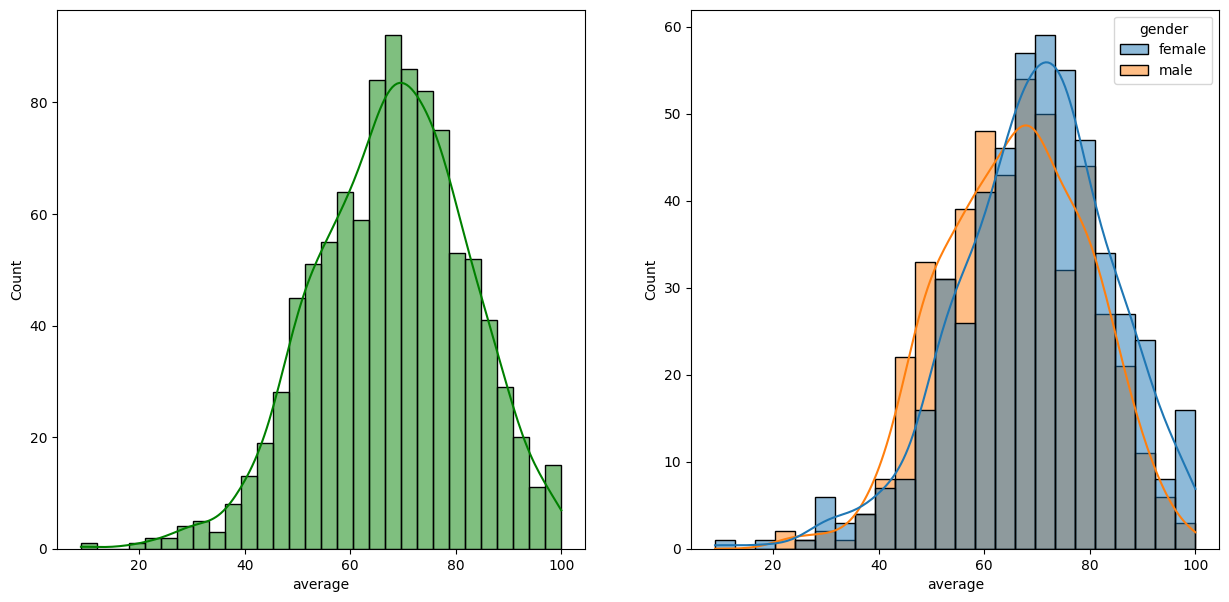

In [132]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=df,x='average',bins=30,kde=True,color='g',ax=axs[0])
sns.histplot(data=df,x='average',kde=True,hue='gender',ax=axs[1])
plt.show()

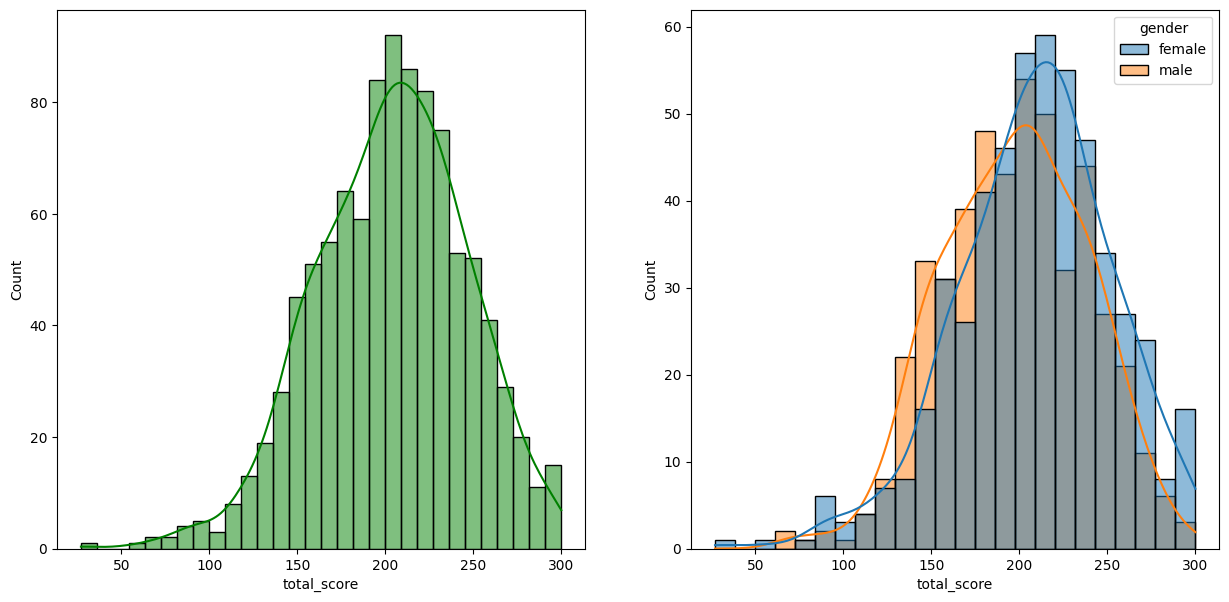

In [133]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
sns.histplot(data=df,x='total_score',kde=True ,bins=30, color='g',ax=axs[0])
sns.histplot(data=df,x='total_score',kde=True,hue='gender',ax=axs[1])
plt.show()